# GG4257 - Urban Analytics: A Toolkit for Sustainable Urban Development
## Lab Workbook No 6: Geodemographics
Dr Fernando Benitez -  University of St Andrews - School of Geography and Sustainable Development - Iteration 2024

> **GOOD ACADEMIC PRACTICE**: As always, The University policy on Good Academic Practice applies. There are probably many ways to address the challenges in here or part of them. You are free to do research and find relevant resources, like the documentation website, if you cited them correctly. But I strongly advise not to use AI tools, most importantly because you won't learn/practice as you are supposed to.
>
>  If you are not aware of **our academic misconduct policy**, kindly take a quick look (Pag 8. https://www.st-ndrews.ac.uk/policy/academic-policies-assessment-examination-and-award-good-academic-practice/good-academic-practice-guidance-for-students-frequently-asked-questions.pdf)


# Introduccion

The following part of this lab is based on [Creating a Geodemographic Classification Using K-means Clustering in R](https://data.cdrc.ac.uk/system/files/pdfgeodemographicslondongl.pdf)

>
> "Geodemographic profiling (or ‘geodemographics’) is the neighbourhood scale analysis of people by where they live. Traditionally, it has fallen into the nomothetic approach to geographic enquiry emphasizing the shared social, economic, and demographic characteristics of different types (o classes) of neighbourhoods, independent of their locations relative to unique places. As such, at the neighbourhood may be widely scattered across a territory or jurisdiction. Geodemografic profiles thus provide summary indicators of the commonalities of social structure that link differen locations" - Longley, 2017"
>

Geodemographic classifications group neighbourhoods (or sometimes even individual households) into types of similar characteristics based on a range of variables. They are a useful means on segmenting the population into distinctive groups in order to effectively channel resources. Such classifications have been effective deductive tools for marketing, retail and service planning industries due to the assumed association between geodemographics and behaviour. 

For instance, typically a classification at the broadest level may distinguish cosmopolitan neighbourhoods with high proportions of young and newly qualified workers from suburban neighbourhoods with high proportions of settled families. Such classifications work because people of likeminded characteristics tend to cluster within cities. Whilst most geodemographic products are built within the commercial sector and sold by vendors, open source alternatives are available.  In this lab we will learn and practice the basic skills to build your own geodemographic classification using Python for the Area of Glasgow at Output Area level. All data and resources for this exercise are freely available. 

## Important references &  datasources

1. https://www.nrscotland.gov.uk/files//geography/2011-census/geog-2011census-higher-geography-classifications.pdf
2. https://www.scotlandscensus.gov.uk/about/2011-census/2011-census-geographies/   
3. Scottish Census 2011 https://www.scotlandscensus.gov.uk/census-results/download-data/census-table-data/
4. https://www.scotlandscensus.gov.uk/about/metadata-a-to-z/
5. https://statistics.gov.scot/data_home

# Getting Started

In this exercise, we will classify areas based on their demographic characteristics using a form of statistical clustering known as **k-means**. We have been applying this algorithm before, but here, we will go into more detail so you can understand why it is relevant. 

The clustering will group cases based on their statistical similarity as exerted by the inputted variables. It is a very effective means of reducing large multivariate databases into a singular, but informative, indicator. 

Cases in the same group may be similar regarding their geodemographic compositions, but they may not be geographically proximal as the technique is aspatial.  This exercise will take you through all the steps necessary to create a classification, from data selection, preparation, clustering and eventually interpretation. Although I have provided a pipeline of useful methods, you will see that the classification builder must make several analytical and **subjective** decisions to produce an optimum classification for a particular purpose. 

The lab also provided some useful references for further reading at the end of this notebook. 

The first step to creating a geodemographic classification is considering what data to include and at what granularity level the data will allow you to capture more intricate variations and reduce any issues of ecological fallacy. However, we also require a good number of useful variables to segment neighbourhoods effectively. The following data has been prepared for this exercise:

* **Study area**: Glasglow City* **Geography (spatial units**): 2011 Output Areas (OAs)
* **Dataset**: 2011 Scottish Census

There are many diferences between the census on England & Wales and Scotland, that includes timeline, census geographies, and other attributes, although there are several similarities, I advise you to check the deatils of each census before doing any analysys or presenting any remarks. 

As usual, the census data are massive datasets that usually come through intrancete format, which requires metadata or data directives to really understand how we can use such data for further analysis. For this academic exercise, we will use a subset of variables from multiple dimensions that will give you a sense of how creating a geodemographic classification looks. 

**Subset of Scottish Census for Output Areas - OA geographies 2011**

* KS102SC - Age structure - Demographics
* KS103SC - Marital and civil partnership status - Demographics
* KS209SCb - Religion - Demographics
* QS104SC - Sex - Demographics
* QS501SC - Highest level of qualification - Education
* QS415SC - Central heating - Households 
* KS105SC - Household composition - Households
* QS302SC - General Health - Health
* KS601SC - Economic activity - Economic 
* KS605SC - Industry - Economic 


# Preparing the data from the census website

In [1]:
import pandas as pd
import os

csv_directory = "data/Lab6/"

# We need a list of all CSV files in the folder
csv_files = [file for file in os.listdir(csv_directory) if file.endswith(".csv")]

# An empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Loop through each CSV file
for csv_file in csv_files:
    csv_path = os.path.join(csv_directory, csv_file) # We create a consistent path
    df_csv = pd.read_csv(csv_path, low_memory=False) #read each file
    # Concatenate/Merge all columns, there is a pitfall here, you will get a duplicate oa_code from all csv files.
    merged_data = pd.concat([merged_data, df_csv], axis=1)

# Save the merged dataset. You might want to do some pre-processing.
#merged_data.to_csv("data/Lab6/merged_census_data.csv", index=False)
# Be aware of the mixted dtype you are importing we unfortunatly have to deal with that later.
# eventually you can avoid this to define the dtype on import method.

Working with all the Output Areas will be demanding, so we will make a filter to work only with only the OA areas from Glasglow City (LAD)

In [2]:
import pandas as pd
import geopandas as gpd

shp_path = "data/Lab6/glasglow_city_OA_2011.shp"
gdf = gpd.read_file(shp_path)

csv_path = "data/Lab6/merged_census_data.csv"
csv_data = pd.read_csv(csv_path, low_memory=False)

# Merge the GeoDataFrame with the DataFrame based on the oa_code
merged_data = gdf.merge(csv_data, left_on='code', right_on='oa_code', how='left')

# You could save the merged data to a new shapefile, but I will skip this now
# but you could do it, in case you need just to read the data you have merged., and avoid
# the previous cell
# merged_data.to_file('data/Lab6/glasgow_census_data.shp', index=False)

I saved it to a file therefore I shouldn't need to do the cells anove, but instead I will just read in the shapefile of the glasgow_census_data --> although I still need to make that

In [9]:
#import pandas as pd
#import geopandas as gpd
#import pandas as pd
#import os

#merged_data = gpd.read_file('data/Lab6/glasgow_census_data.shp')

# Selecting input variables

While many general purpose classifications use a wide range of variables on the population, those with a special application should be more selective. The most common uses of geodemographic classifications today are for marketing and service planning as generally consumer behaviour and service needs will vary by different geodemographic segments.

If we are classifying areas in the context of marketing we are interested developing a good understanding of residents’ behaviour, their needs and their activities. Population data include several variables which can be used to provide useful inferences about consumer behaviour. For instance, areas with high proportions of families with young children will generally have different consumer traits to neighbourhoods with high proportions of young  adults. 

Likewise, other domains such as socio-economics, ethnicity, tenure, car ownership,etc...will also influence consumer behaviour.The aim here is to select a number of useful variables for your geodemographic classification from the 2011 Census data. 

The dataset we provided contains 135 variables. You might not need all of them. Indeed, having too many similar variables may skew the results of the classification toward particular domains or subgroups.

Furthermore, some variables may add too little value due to the phenomena they offer. To aid your decision a metadata website are always included in any census which summarises the variables has been provided. It will be worth considering what domain these variables represent before proceeding (E.g. age & sex, migration, family structure, ethnicity, employment & occupation, education and professional qualifications, housing, car ownership, health, mode of transport). Do not just pick up ay variable becase seeems interesting, first define the why and who of the geodemographics and then what variable and domains better represent or contribute to that aim.

In [3]:
list(merged_data.columns)
#This is just a small sample of the number of potential variables you have available in the census
# Using some ML techniques, you could include hundreds of these to make your geodemographics
# more meaningful. For this academic exercise, only 386 variables will be loaded,
# and then filtered to be included in the cluster

['OBJECTID',
 'code',
 'HHcount',
 'Popcount',
 'council',
 'sqkm',
 'hect',
 'masterpc',
 'easting',
 'northing',
 'SHAPE_1_Le',
 'SHAPE_1_Ar',
 'DataZone',
 'geometry',
 'oa_code',
 'All people',
 '0 to 4',
 '5 to 7',
 '8 to 9',
 '10 to 14',
 '15',
 '16 to 17',
 '18 to 19',
 '20 to 24',
 '25 to 29',
 '30 to 44',
 '45 to 59',
 '60 to 64',
 '65 to 74',
 '75 to 84',
 '85 to 89',
 '90 and over',
 'Mean age',
 'Median age',
 'oa_code.20',
 'All people aged 16 and over',
 'Single (never married or never registered a same-sex civil partnership)',
 'Married',
 'In a registered same-sex civil partnership',
 'Separated (but still legally married or still legally in a same-sex civil partnership)',
 'Divorced or formerly in a same-sex civil partnership which is now legally dissolved',
 'Widowed or surviving partner from a same-sex civil partnership',
 'oa_code.21',
 'All households',
 'One person household: Aged 65 and over',
 'One person household: Aged under 65',
 'One family only: All aged 65

In [4]:
merged_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5486 entries, 0 to 5485
Columns: 377 entries, OBJECTID to All people aged 16 and over: Level 4 and above.2
dtypes: float64(7), geometry(1), int64(90), object(279)
memory usage: 15.8+ MB


In [5]:
merged_data.shape

(5486, 377)

In [6]:
merged_data.head()

OBJECTID       code  HHcount  Popcount    council      sqkm       hect  \
0     14899  S00116734       43        68  S12000046  0.003025   0.302468   
1     14900  S00117187       44       112  S12000046  0.020914   2.091396   
2     14901  S00115001       48        94  S12000046  0.005215   0.521504   
3     14902  S00116807       49       126  S12000046  0.123997  12.399719   
4     14903  S00113176       81       156  S12000046  0.010345   1.034486   

  masterpc easting northing  ...  \
0  G11 6DF  255484   666549  ...   
1  G33 1QQ  263549   668792  ...   
2  G44 4AR  258346   661116  ...   
3  G13 1SR  254495   668349  ...   
4  G20 6UG  257990   666907  ...   

   Solid fuel (for example wood coal) central heating.2  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   Other central heating.2 Two or more types of central heating.2 oa_code.29  \
0                        1                                      2  S00116734   
1                        0                                      2  S00117187   
2                        0                                      4  S00115001   
3                        0                                      0  S00116807   
4                        0                                      2  S00113176   

  All people aged 16 and over.5  \
0                            65   
1                            88   
2                            78   
3                            92   
4                           134   

  All people aged 16 and over: No qualifications.2  \
0                                               12   
1                                               17   
2                                               32   
3                                                4   
4                                               34   

  All people aged 16 and over: Level 1.2  \
0                                      9   
1                                     25   
2                                     17   
3                                     12   
4                                     12   

  All people aged 16 and over: Level 2.2  \
0                                      8   
1                                     11   
2                                      8   
3                                     12   
4                                     19   

  All people aged 16 and over: Level 3.2  \
0                                      8   
1                                     13   
2                                     10   
3                                      8   
4                                     11   

  All people aged 16 and over: Level 4 and above.2  
0                                               28  
1                                               22  
2                                               11  
3                                               56  
4                                               58  

[5 rows x 377 columns]

# Descriptive Statistics Analysis - DEA


The idea of this preleminary analysis, is to identify potential bias, gaps of data, outliers, and potential source of error by checking most of the most interesting variables you want for your geodemographics. 

In [16]:
# summary statistics
merged_data['Economically active: Employee: Part-time'].describe()

count     5486
unique      34
top          5
freq       459
Name: Economically active: Employee: Part-time, dtype: object

In [17]:
merged_data.Married.describe()

count     5486
unique     113
top         16
freq       216
Name: Married, dtype: object

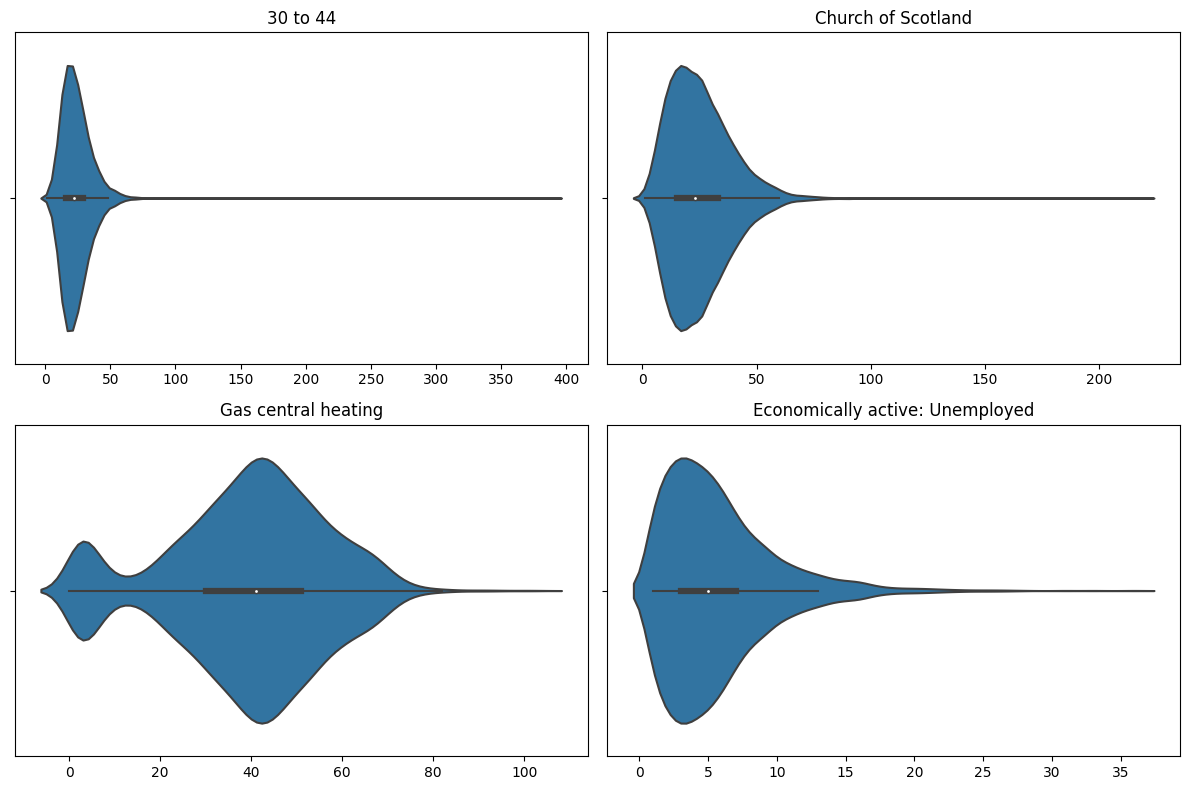

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

attributes_to_plot = ['30 to 44',
                      'Church of Scotland',
                      'Gas central heating',
                      'Economically active: Unemployed']

plt.figure(figsize=(12, 8))

for i, attribute in enumerate(attributes_to_plot, 1):
    plt.subplot(2, 2, i)
    merged_data[attribute] = pd.to_numeric(merged_data[attribute], errors='coerce')
    sns.violinplot(x=merged_data[attribute])
    plt.title(attribute)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

C:\Users\oscar\miniforge3\envs\ua\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oscar\miniforge3\envs\ua\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oscar\miniforge3\envs\ua\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oscar\miniforge3\envs\ua\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

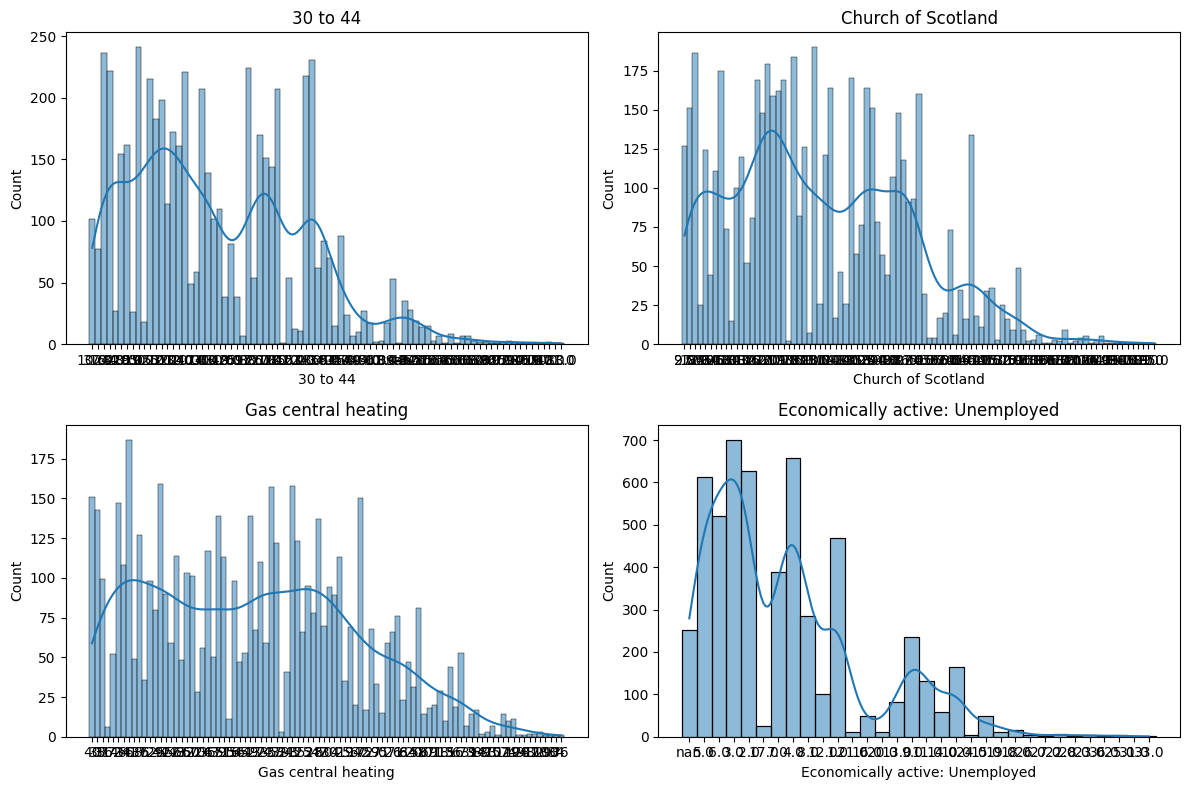

In [19]:
import matplotlib.pyplot as plt

attributes_to_plot = ['30 to 44',
                      'Church of Scotland',
                      'Gas central heating',
                      'Economically active: Unemployed']

plt.figure(figsize=(12, 8))

for i, attribute in enumerate(attributes_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(merged_data[attribute].astype(str), kde=True)
    plt.title(attribute)

plt.tight_layout()
plt.show()

# Standardisation between areas

To reduce the effects of unbalanced base population sizes across each of the small area units (**Output Areas**) the variables all need to be transformed into percentages. 

However, please note that if you were to create your own percentages from aggregate population data it is important to ensure you are dividing the nominator by the correct dominator. The dominators create from Census data will vary between data tables (i.e. the total population, the total number of households, the 
total of the economically active population, and so forth)

## Subsetting data

When we have decided which variables we are interested in, we can create a new subsetted data object.You can adapt the code below to include the variables of you are interested in. Here we
have selected 19 variables as an example related to several aspects of the census data in the following order.

1. Education
2. Age Range
3. Religion
4. Marrital
5. Household composition
6. Central heating type in household
7. Sex
8. Economics
9. Health
10. Industry Sectors


In [20]:
def calculate_percentages(dataframe, total_columns, value_columns):

    result_df = pd.DataFrame()

    for total_col, value_col in zip(total_columns, value_columns):
        percentage_col_name = f"{value_col}_percentage"

        if total_col not in dataframe.columns:
            raise ValueError(f"Total column '{total_col}' not found in the DataFrame.")
        # The data have several empty values, so you need to process them, forcing them to be a numeric or NaN value
        dataframe[value_col] = pd.to_numeric(dataframe[value_col], errors='coerce')
        dataframe[total_col] = pd.to_numeric(dataframe[total_col], errors='coerce')
        
        result_df[percentage_col_name] = (dataframe[value_col] / dataframe[total_col]) * 100

    return result_df

# List of the corresponding totals.
total_cols = ['All people aged 16 and over',
              'All people',
              'All people.1','All people.1',
              'All people aged 16 and over.1', 'All people aged 16 and over.1',
              'All households','All households',
              'All occupied household spaces', 'All occupied household spaces',
              'All people.2','All people.2',
              'All people aged 16 to 74', 'All people aged 16 to 74',
              'All people.3', 'All people.3',
              'All people aged 16 to 74 in employment','All people aged 16 to 74 in employment',
              'All people aged 16 to 74 in employment' ]
# List of the corresponding values. 
value_cols = ['All people aged 16 and over: Level 4 and above',
              '30 to 44',
              'Church of Scotland',
              'No religion',
              'Single (never married or never registered a same-sex civil partnership)',
              'Married',
              'One family only: Married or same-sex civil partnership couple: With dependent children',
              'One person household: Aged under 65',
              'Gas central heating',
              'Electric (including storage heaters) central heating',
              'Males',
              'Females',
              'Economically active: Employee: Full-time',
              'Economically active: Unemployed',
              'Good health',
              'Bad health',
              'F. Construction', 'J. Information and communication', 'P. Education']

# Later we migth need to rename those columns., for now is ok...
result_dataframe = calculate_percentages(merged_data, total_cols, value_cols)

# Likely you could also do all this in Excel :D
# but what's important is you are aware of the correct total as dominator, census data can be very tricky

In [21]:
result_dataframe.head()

All people aged 16 and over: Level 4 and above_percentage  \
0                                          43.076923           
1                                          25.000000           
2                                          14.102564           
3                                          60.869565           
4                                          43.283582           

   30 to 44_percentage  Church of Scotland_percentage  No religion_percentage  \
0            14.705882                      13.235294               45.588235   
1            33.035714                      24.107143               32.142857   
2            17.021277                      19.148936               41.489362   
3            18.253968                      39.682540               26.984127   
4            28.205128                      18.589744               32.051282   

   Single (never married or never registered a same-sex civil partnership)_percentage  \
0                                          66.153846                                    
1                                          37.500000                                    
2                                          51.282051                                    
3                                          28.260870                                    
4                                          47.761194                                    

   Married_percentage  \
0           13.846154   
1           47.727273   
2           21.794872   
3           55.434783   
4           31.343284   

   One family only: Married or same-sex civil partnership couple: With dependent children_percentage  \
0                                                NaN                                                   
1                                          29.545455                                                   
2                                           6.250000                                                   
3                                          30.612245                                                   
4                                           8.641975                                                   

   One person household: Aged under 65_percentage  \
0                                       51.162791   
1                                       13.636364   
2                                       18.750000   
3                                       10.204082   
4                                       24.691358   

   Gas central heating_percentage  \
0                       93.023256   
1                       86.363636   
2                       79.166667   
3                       63.265306   
4                       95.061728   

   Electric (including storage heaters) central heating_percentage  \
0                                           0.000000                 
1                                           9.090909                 
2                                          10.416667                 
3                                          34.693878                 
4                                           2.469136                 

   Males_percentage  Females_percentage  \
0         50.000000           50.000000   
1         49.107143           50.892857   
2         45.744681           54.255319   
3         49.206349           50.793651   
4         46.794872           53.205128   

   Economically active: Employee: Full-time_percentage  \
0                                          30.508475     
1                                          41.379310     
2                                          50.793651     
3                                          44.047619     
4                                          35.294118     

   Economically active: Unemployed_percentage  Good health_percentage  \
0                                         NaN               30.882353   
1                                    5.747126               30.357143   
2                             

In [22]:
result_dataframe.shape

(5486, 19)

In [23]:
# Concatenate the resulting tables.
concatenated_df = pd.concat([merged_data, result_dataframe], axis=1, ignore_index=False)
concatenated_df.head()

OBJECTID       code  HHcount  Popcount    council      sqkm       hect  \
0     14899  S00116734       43        68  S12000046  0.003025   0.302468   
1     14900  S00117187       44       112  S12000046  0.020914   2.091396   
2     14901  S00115001       48        94  S12000046  0.005215   0.521504   
3     14902  S00116807       49       126  S12000046  0.123997  12.399719   
4     14903  S00113176       81       156  S12000046  0.010345   1.034486   

  masterpc easting northing  ...  \
0  G11 6DF  255484   666549  ...   
1  G33 1QQ  263549   668792  ...   
2  G44 4AR  258346   661116  ...   
3  G13 1SR  254495   668349  ...   
4  G20 6UG  257990   666907  ...   

   Electric (including storage heaters) central heating_percentage  \
0                                           0.000000                 
1                                           9.090909                 
2                                          10.416667                 
3                                          34.693878                 
4                                           2.469136                 

   Males_percentage Females_percentage  \
0         50.000000          50.000000   
1         49.107143          50.892857   
2         45.744681          54.255319   
3         49.206349          50.793651   
4         46.794872          53.205128   

  Economically active: Employee: Full-time_percentage  \
0                                          30.508475    
1                                          41.379310    
2                                          50.793651    
3                                          44.047619    
4                                          35.294118    

  Economically active: Unemployed_percentage  Good health_percentage  \
0                                        NaN               30.882353   
1                                   5.747126               30.357143   
2                                   9.523810               30.851064   
3                                   3.571429               20.634921   
4                                   1.680672               22.435897   

  Bad health_percentage F. Construction_percentage  \
0              2.941176                  12.500000   
1              3.571429                   6.060606   
2              6.382979                  10.526316   
3              2.380952                   7.272727   
4              5.769231                   5.633803   

  J. Information and communication_percentage P. Education_percentage  
0                                    3.125000                6.250000  
1                                    6.060606                6.060606  
2                                    5.263158                7.894737  
3                                    7.272727               18.181818  
4                                    7.042254               14.084507  

[5 rows x 396 columns]

In [24]:
concatenated_df.shape

(5486, 396)

In [25]:
list(concatenated_df.columns)

['OBJECTID',
 'code',
 'HHcount',
 'Popcount',
 'council',
 'sqkm',
 'hect',
 'masterpc',
 'easting',
 'northing',
 'SHAPE_1_Le',
 'SHAPE_1_Ar',
 'DataZone',
 'geometry',
 'oa_code',
 'All people',
 '0 to 4',
 '5 to 7',
 '8 to 9',
 '10 to 14',
 '15',
 '16 to 17',
 '18 to 19',
 '20 to 24',
 '25 to 29',
 '30 to 44',
 '45 to 59',
 '60 to 64',
 '65 to 74',
 '75 to 84',
 '85 to 89',
 '90 and over',
 'Mean age',
 'Median age',
 'oa_code.20',
 'All people aged 16 and over',
 'Single (never married or never registered a same-sex civil partnership)',
 'Married',
 'In a registered same-sex civil partnership',
 'Separated (but still legally married or still legally in a same-sex civil partnership)',
 'Divorced or formerly in a same-sex civil partnership which is now legally dissolved',
 'Widowed or surviving partner from a same-sex civil partnership',
 'oa_code.21',
 'All households',
 'One person household: Aged 65 and over',
 'One person household: Aged under 65',
 'One family only: All aged 65

In [26]:
# Subsetting the attributes we need, we dont need the total for now.
keep_cols= [
    'code',
    'Popcount',
    'HHcount',
    'DataZone',
    'geometry',
    'All people aged 16 and over: Level 4 and above_percentage',
     '30 to 44_percentage',
     'Church of Scotland_percentage',
     'No religion_percentage',
     'Single (never married or never registered a same-sex civil partnership)_percentage',
     'Married_percentage',
     'One family only: Married or same-sex civil partnership couple: With dependent children_percentage',
     'One person household: Aged under 65_percentage',
     'Gas central heating_percentage',
     'Electric (including storage heaters) central heating_percentage',
     'Males_percentage',
     'Females_percentage',
     'Economically active: Employee: Full-time_percentage',
     'Economically active: Unemployed_percentage',
     'Good health_percentage',
     'Bad health_percentage',
     'F. Construction_percentage',
     'J. Information and communication_percentage',
     'P. Education_percentage'
]

glasglow_census_data = concatenated_df[keep_cols]

In [27]:
glasglow_census_data.head()

code  Popcount  HHcount   DataZone  \
0  S00116734        68       43  S01010388   
1  S00117187       112       44  S01010193   
2  S00115001        94       48  S01010006   
3  S00116807       126       49  S01010414   
4  S00113176       156       81  S01010298   

                                            geometry  \
0  POLYGON ((255500.108 666499.857, 255456.001 66...   
1  POLYGON ((263703.000 668871.000, 263697.000 66...   
2  POLYGON ((258432.092 661109.037, 258407.904 66...   
3  POLYGON ((254643.000 668695.000, 254651.000 66...   
4  POLYGON ((258033.000 666935.000, 258020.000 66...   

   All people aged 16 and over: Level 4 and above_percentage  \
0                                          43.076923           
1                                          25.000000           
2                                          14.102564           
3                                          60.869565           
4                                          43.283582           

   30 to 44_percentage  Church of Scotland_percentage  No religion_percentage  \
0            14.705882                      13.235294               45.588235   
1            33.035714                      24.107143               32.142857   
2            17.021277                      19.148936               41.489362   
3            18.253968                      39.682540               26.984127   
4            28.205128                      18.589744               32.051282   

   Single (never married or never registered a same-sex civil partnership)_percentage  \
0                                          66.153846                                    
1                                          37.500000                                    
2                                          51.282051                                    
3                                          28.260870                                    
4                                          47.761194                                    

   ...  Electric (including storage heaters) central heating_percentage  \
0  ...                                           0.000000                 
1  ...                                           9.090909                 
2  ...                                          10.416667                 
3  ...                                          34.693878                 
4  ...                                           2.469136                 

   Males_percentage  Females_percentage  \
0         50.000000           50.000000   
1         49.107143           50.892857   
2         45.744681           54.255319   
3         49.206349           50.793651   
4         46.794872           53.205128   

   Economically active: Employee: Full-time_percentage  \
0                                          30.508475     
1                                          41.379310     
2                                          50.793651     
3                                          44.047619     
4                                          35.294118     

   Economically active: Unemployed_percentage  Good health_percentage  \
0                                         NaN               30.882353   
1                                    5.747126               30.357143   
2                                    9.523810               30.851064   
3                                    3.571429               20.634921   
4                                    1.680672               22.435897   

   Bad health_percentage  F. Construction_percentage  \
0               2.941176                   12.500000   
1               3.571429                    6.060606   
2               6.382979                   10.526316   
3               2.380952                    7.272727   
4               5.769231                    5.633803   

   J. Information and communication_percentage  P. Education_percentage  
0                                     3.125000                 6.250000  
1   

In [28]:
# For more easy manipulation we define short column names
short_column_names = {
    'All people aged 16 and over: Level 4 and above_percentage': 'Edu_Level4',
    '30 to 44_percentage': '30to44',
    'Church of Scotland_percentage': 'Ch_of_Scot',
    'No religion_percentage': 'No_Religion',
    'Single (never married or never registered a same-sex civil partnership)_percentage': 'Single',
    'Married_percentage': 'Married',
    'One family only: Married or same-sex civil partnership couple: With dependent children_percentage': 'Family_With_Children',
    'One person household: Aged under 65_percentage': 'Family_1Person',
    'Gas central heating_percentage': 'Gas_Heating',
    'Electric (including storage heaters) central heating_percentage': 'Electric_Heating',
    'Males_percentage': 'Males',
    'Females_percentage': 'Females',
    'Economically active: Employee: Full-time_percentage': 'Emp_FullTime',
    'Economically active: Unemployed_percentage': 'Unemployed',
    'Good health_percentage': 'Good_Health',
    'Bad health_percentage': 'Bad_Health',
    'F. Construction_percentage': 'Construction',
    'J. Information and communication_percentage': 'Info_Comm',
    'P. Education_percentage': 'Education'
}

glasglow_census_data = glasglow_census_data.rename(columns=short_column_names)

In [29]:
glasglow_census_data.head()

code  Popcount  HHcount   DataZone  \
0  S00116734        68       43  S01010388   
1  S00117187       112       44  S01010193   
2  S00115001        94       48  S01010006   
3  S00116807       126       49  S01010414   
4  S00113176       156       81  S01010298   

                                            geometry  Edu_Level4     30to44  \
0  POLYGON ((255500.108 666499.857, 255456.001 66...   43.076923  14.705882   
1  POLYGON ((263703.000 668871.000, 263697.000 66...   25.000000  33.035714   
2  POLYGON ((258432.092 661109.037, 258407.904 66...   14.102564  17.021277   
3  POLYGON ((254643.000 668695.000, 254651.000 66...   60.869565  18.253968   
4  POLYGON ((258033.000 666935.000, 258020.000 66...   43.283582  28.205128   

   Ch_of_Scot  No_Religion     Single  ...  Electric_Heating      Males  \
0   13.235294    45.588235  66.153846  ...          0.000000  50.000000   
1   24.107143    32.142857  37.500000  ...          9.090909  49.107143   
2   19.148936    41.489362  51.282051  ...         10.416667  45.744681   
3   39.682540    26.984127  28.260870  ...         34.693878  49.206349   
4   18.589744    32.051282  47.761194  ...          2.469136  46.794872   

     Females  Emp_FullTime  Unemployed  Good_Health  Bad_Health  Construction  \
0  50.000000     30.508475         NaN    30.882353    2.941176     12.500000   
1  50.892857     41.379310    5.747126    30.357143    3.571429      6.060606   
2  54.255319     50.793651    9.523810    30.851064    6.382979     10.526316   
3  50.793651     44.047619    3.571429    20.634921    2.380952      7.272727   
4  53.205128     35.294118    1.680672    22.435897    5.769231      5.633803   

   Info_Comm  Education  
0   3.125000   6.250000  
1   6.060606   6.060606  
2   5.263158   7.894737  
3   7.272727  18.181818  
4   7.042254  14.084507  

[5 rows x 24 columns]

# Standardisation between variables

This part is important, that is  erratic values within variables do not inadvertently dominate the clustering process, the inut variables need to be standardised so that they each contribute an equal weight. Standardising the data will also make the final outputs much easier to interpet.

This can be achieved in various ways but here we will adopt a straightforward approach calculating **z-scores** for each variable. **Z-scores (or standard scores)** describe a standardisation format where all values are represented as the number of standard deviations from the mean (0). 

Therefore, positive Z-scores indicate that the values are above the mean. Crucially, it is now easy to compare the varaibles on a common scale.


> Remember: z-score = (x- mean of the population)/standard deviation of the population


There are other methods we can also use to standarise the variables. Such requirements were formulated after the outcome of a [national consultation exercise delivered by the ONS](http://www.ons.gov.uk/ons/guide-method/geography/products/area-classifications/ns-area-classifications/new-uk-output-area-classification/index.html).


> Inverse hyperbolic sine standardization ([inverse hyperbolic sine](https://en.wikipedia.org/wiki/Inverse_hyperbolic_function))

```python
def inverse_hyperbolic_sine_standardization(x):
    return np.arcsinh(x)

validated_df_ihs = dataset.apply(inverse_hyperbolic_sine_standardization)

```
> Range standardization

```python
def range_standardization(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

validated_df_range = validated_df_ihs.apply(range_standardization)

```

In [30]:
glasglow_census_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5486 entries, 0 to 5485
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   code                  5486 non-null   object  
 1   Popcount              5486 non-null   int64   
 2   HHcount               5486 non-null   int64   
 3   DataZone              5486 non-null   object  
 4   geometry              5486 non-null   geometry
 5   Edu_Level4            5462 non-null   float64 
 6   30to44                5483 non-null   float64 
 7   Ch_of_Scot            5479 non-null   float64 
 8   No_Religion           5484 non-null   float64 
 9   Single                5484 non-null   float64 
 10  Married               5470 non-null   float64 
 11  Family_With_Children  4900 non-null   float64 
 12  Family_1Person        5460 non-null   float64 
 13  Gas_Heating           5486 non-null   float64 
 14  Electric_Heating      5486 non-null   float64 
 

In [31]:
# Calculate z-score for each column, but we need to initially filter only the float attributes.
# bcs you can't calculate that for the OA code.. :P

numeric_columns = glasglow_census_data.select_dtypes(include='float64')
z_score_df = (numeric_columns - numeric_columns.mean()) / numeric_columns.std(ddof=0)
z_score_df.head()

Edu_Level4    30to44  Ch_of_Scot  No_Religion    Single   Married  \
0    0.925755 -0.929394   -1.010584     1.214476  1.094481 -1.091284   
1   -0.017675  1.348150    0.071165     0.085352 -0.737568  1.174694   
2   -0.586409 -0.641698   -0.422177     0.870259  0.143618 -0.559671   
3    1.854348 -0.488532    1.620916    -0.347871 -1.328293  1.690175   
4    0.936540  0.747933   -0.477816     0.077662 -0.081496  0.078929   

   Family_With_Children  Family_1Person  Gas_Heating  Electric_Heating  \
0                   NaN        1.319615     0.612924         -0.635784   
1              2.228807       -0.984420     0.368737         -0.283603   
2             -0.435975       -0.670454     0.104848         -0.232244   
3              2.350837       -1.195154    -0.478203          0.708252   
4             -0.162355       -0.305669     0.687668         -0.540130   

      Males   Females  Emp_FullTime  Unemployed  Good_Health  Bad_Health  \
0  0.260954 -0.260954     -0.429766         NaN     0.414780   -0.858713   
1  0.122038 -0.122038      0.396134   -0.283903     0.330141   -0.731475   
2 -0.401113  0.401113      1.111377    0.484644     0.409738   -0.163871   
3  0.137473 -0.137473      0.598855   -0.726653    -1.236621   -0.971813   
4 -0.237718  0.237718     -0.066182   -1.111418    -0.946389   -0.287776   

   Construction  Info_Comm  Education  
0      1.028574  -0.107508  -0.375570  
1     -0.184699   0.688365  -0.407370  
2      0.656704   0.472169  -0.099411  
3      0.043681   1.016984   1.627840  
4     -0.265115   0.954500   0.939882

## Measure the variables for association


It is useful to test for associations between the final selection of variables. Collinear variables would essentially convey very similar distributions.

This could give a particular phenomenon a higher weighting in the final classification. To check for multicollinearity, we can create a Pearson’s correlation matrix for the dataset. For every pair of variables, a Pearson’s coefficient and significance value are calculated. 

A Pearson’s coefficient (or r-square value) is presented on a scale between -1 and 1. The greater the value the greater the association between the two variable is. The direction of the value relate to the direction of the relationship, negative values represent negative relationships.

As a rule of thumb, two variables with coefficients greater than ±0.8 can be considered highly correlated. In these cases, it might be reasonable to remove the variable that correlates the greatest with the other variables in the matrix so that you are left with the most unique ones. 

If you remove a varaible, you mmay need to find new variables to replace it. However, of course, some researchers might argue that it is reasonable to retain correlated variables so long as each has unique value and meaning. Indeed, so long as the correlations are not quite perfect (i.e 1 or -1), both variables in the pairs may contain useful outliers which could help distinguish certain areas.

In [32]:
z_score_df.shape

(5486, 19)

In [33]:
corr = z_score_df.corr()
corr.style.background_gradient(cmap='coolwarm')

The previous table is usually complicated to read especially if you have several variables, so we can create a matrix that represet the higher correlated values.

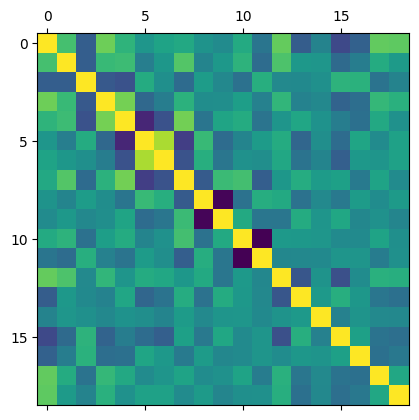

In [34]:
import matplotlib.pyplot as plt

plt.matshow(z_score_df.corr())
plt.show()

Some how we see there are a few pair of variables causing high correlations. But we can try something else...Using the rule of thumb (80% correlation). We could define that as a threshold to easy validate the correlation value. 

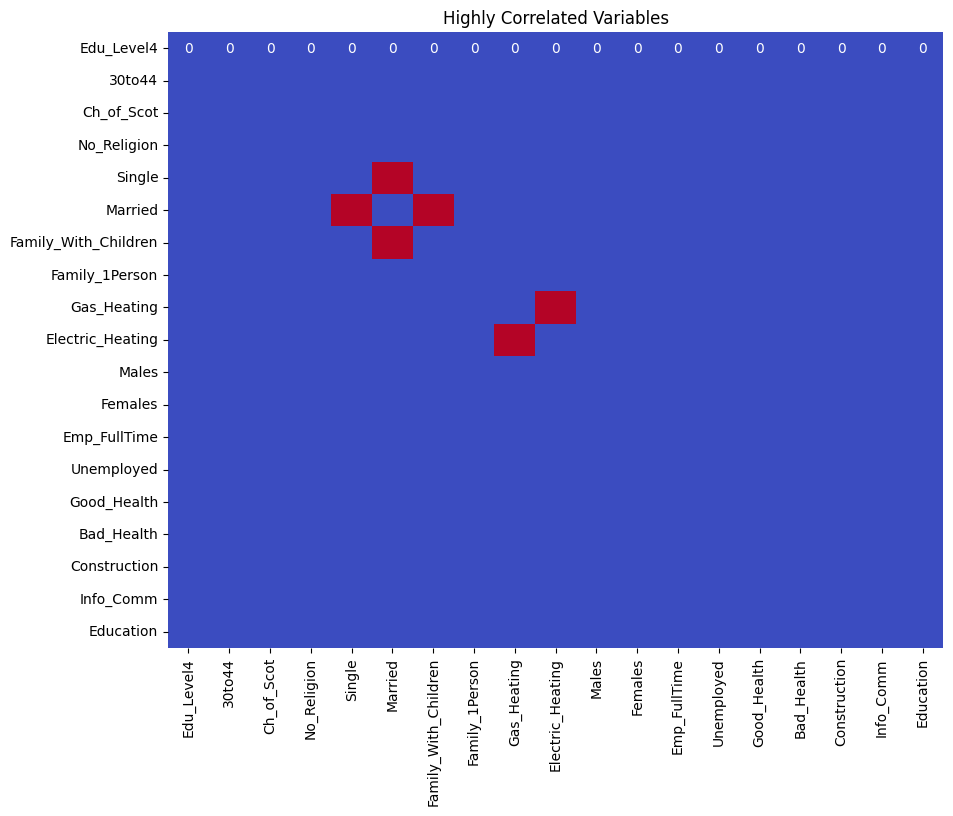

In [35]:
threshold = 0.7 # We can adapt this based on waht we have in our data. Recall the subjetivity issue?
# So if we include .8 then we wont be able to reduce any variables., so I took the threshold to 70%

highly_correlated = (corr.abs() > threshold) & (corr.abs() < 1.0)

plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated, cmap='coolwarm', cbar=False, annot=True)

plt.title('Highly Correlated Variables')
plt.show()

# The plot will represent  BINARY table 0 for false( out of the threshold) and 1 for above the threshold.
# but I also coloured so it is easier to use and cute :) 

In [36]:
z_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5486 entries, 0 to 5485
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Edu_Level4            5462 non-null   float64
 1   30to44                5483 non-null   float64
 2   Ch_of_Scot            5479 non-null   float64
 3   No_Religion           5484 non-null   float64
 4   Single                5484 non-null   float64
 5   Married               5470 non-null   float64
 6   Family_With_Children  4900 non-null   float64
 7   Family_1Person        5460 non-null   float64
 8   Gas_Heating           5486 non-null   float64
 9   Electric_Heating      5486 non-null   float64
 10  Males                 5484 non-null   float64
 11  Females               5484 non-null   float64
 12  Emp_FullTime          5483 non-null   float64
 13  Unemployed            5232 non-null   float64
 14  Good_Health           5484 non-null   float64
 15  Bad_Health           

Based on the previous results, we can remove the most correlated variables.

In [37]:
z_score_df.drop(['Family_With_Children', 'Gas_Heating', 'Single'], axis=1, inplace=True)
z_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5486 entries, 0 to 5485
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Edu_Level4        5462 non-null   float64
 1   30to44            5483 non-null   float64
 2   Ch_of_Scot        5479 non-null   float64
 3   No_Religion       5484 non-null   float64
 4   Married           5470 non-null   float64
 5   Family_1Person    5460 non-null   float64
 6   Electric_Heating  5486 non-null   float64
 7   Males             5484 non-null   float64
 8   Females           5484 non-null   float64
 9   Emp_FullTime      5483 non-null   float64
 10  Unemployed        5232 non-null   float64
 11  Good_Health       5484 non-null   float64
 12  Bad_Health        5207 non-null   float64
 13  Construction      5486 non-null   float64
 14  Info_Comm         5486 non-null   float64
 15  Education         5486 non-null   float64
dtypes: float64(16)
memory usage: 685.9 KB


Now lets check again....

In [38]:
corr_2 = z_score_df.corr()
corr_2.style.background_gradient(cmap='coolwarm')

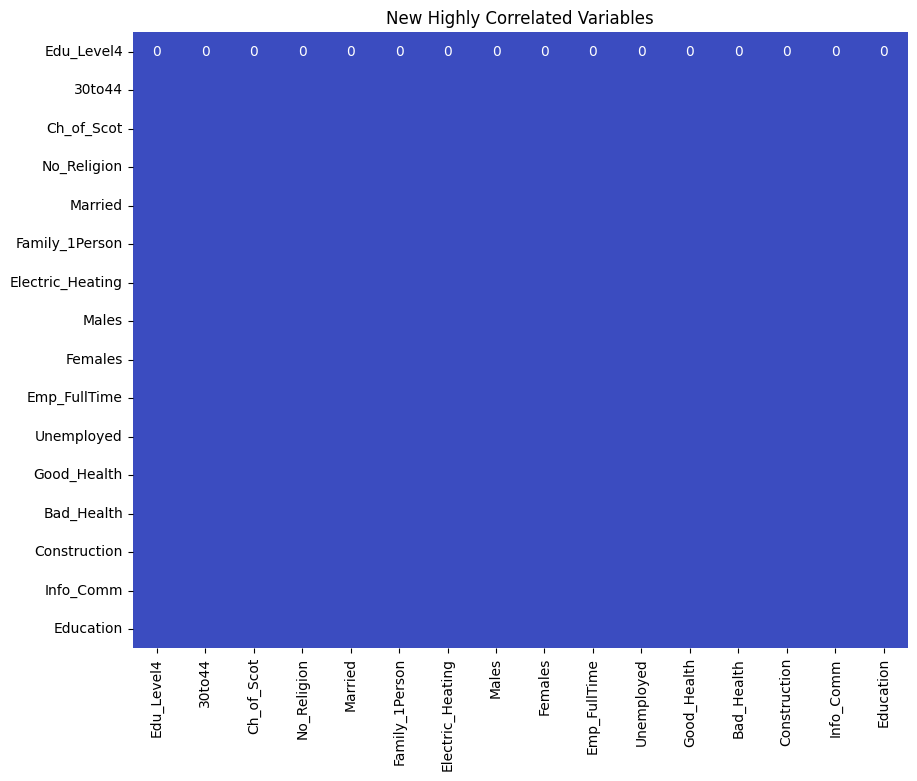

In [39]:
threshold = 0.7
highly_correlated_2 = (corr_2.abs() > threshold) & (corr_2.abs() < 1.0)

plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated_2, cmap='coolwarm', cbar=False, annot=True)

plt.title('New Highly Correlated Variables')
plt.show()

Wahoo!!!, but before running the next part of the process, we also need to get ride of the NaN values. What a nightmare I know!.

In [40]:
contains_nan = z_score_df.isna().any().any()

if contains_nan:
    print("Oh no :( the DataFrame contains NaN values.")
else:
    print("Wahoo! the dataFrame does not contain NaN values. I'm the best")

Oh no :( the DataFrame contains NaN values.


There are many ways we can use to deal with the NaN values, one of those is **Imputation**: The idea behind it to replace NaN values with an estimate based on the rest of the data. Common methods include using the mean, median, or mode of the column. We will try the mean. Of couse that will depend of the nature of the variable, this is just an example. 

In [41]:
z_score_df.fillna(z_score_df.mean(), inplace=True)

In [42]:
z_score_df.head()

Edu_Level4    30to44  Ch_of_Scot  No_Religion   Married  Family_1Person  \
0    0.925755 -0.929394   -1.010584     1.214476 -1.091284        1.319615   
1   -0.017675  1.348150    0.071165     0.085352  1.174694       -0.984420   
2   -0.586409 -0.641698   -0.422177     0.870259 -0.559671       -0.670454   
3    1.854348 -0.488532    1.620916    -0.347871  1.690175       -1.195154   
4    0.936540  0.747933   -0.477816     0.077662  0.078929       -0.305669   

   Electric_Heating     Males   Females  Emp_FullTime    Unemployed  \
0         -0.635784  0.260954 -0.260954     -0.429766  2.172914e-17   
1         -0.283603  0.122038 -0.122038      0.396134 -2.839033e-01   
2         -0.232244 -0.401113  0.401113      1.111377  4.846440e-01   
3          0.708252  0.137473 -0.137473      0.598855 -7.266534e-01   
4         -0.540130 -0.237718  0.237718     -0.066182 -1.111418e+00   

   Good_Health  Bad_Health  Construction  Info_Comm  Education  
0     0.414780   -0.858713      1.028574  -0.107508  -0.375570  
1     0.330141   -0.731475     -0.184699   0.688365  -0.407370  
2     0.409738   -0.163871      0.656704   0.472169  -0.099411  
3    -1.236621   -0.971813      0.043681   1.016984   1.627840  
4    -0.946389   -0.287776     -0.265115   0.954500   0.939882

In [43]:
z_score_df.shape

(5486, 16)

# K-means clustering

We will use the k-means clustering method, the same approach used to produce the Output Area Classifications you can find in multiple website in the UK. It is a top-down approach whereby the number of cluster groups is predefined. K-means is an iterative relocation algorithm based on an error sum of squares measure. The algorithm seeks to reduce the sum distance between each data point and their respective cluster centre. The diagram below illustrates the basic algorithm process of k-means clustering. 

It starts by randomly allocating seeds across a multidimensional space as defined by the variables, each case is then assigned to the nearest seed centroid. In other words, the cases are assigned into cluster groups based on the seed they are nearest to across the multiple variables.

Following the first iteration, a new seed is created at the centroid of each of the clusters. Each case is then re-assigned to clusters based on the distance to the nearest of these new centroids. This process repeats iteratively until the centroid seed locations cannot be moved as an optimum solution has been reached (See Harris et al., 2005).

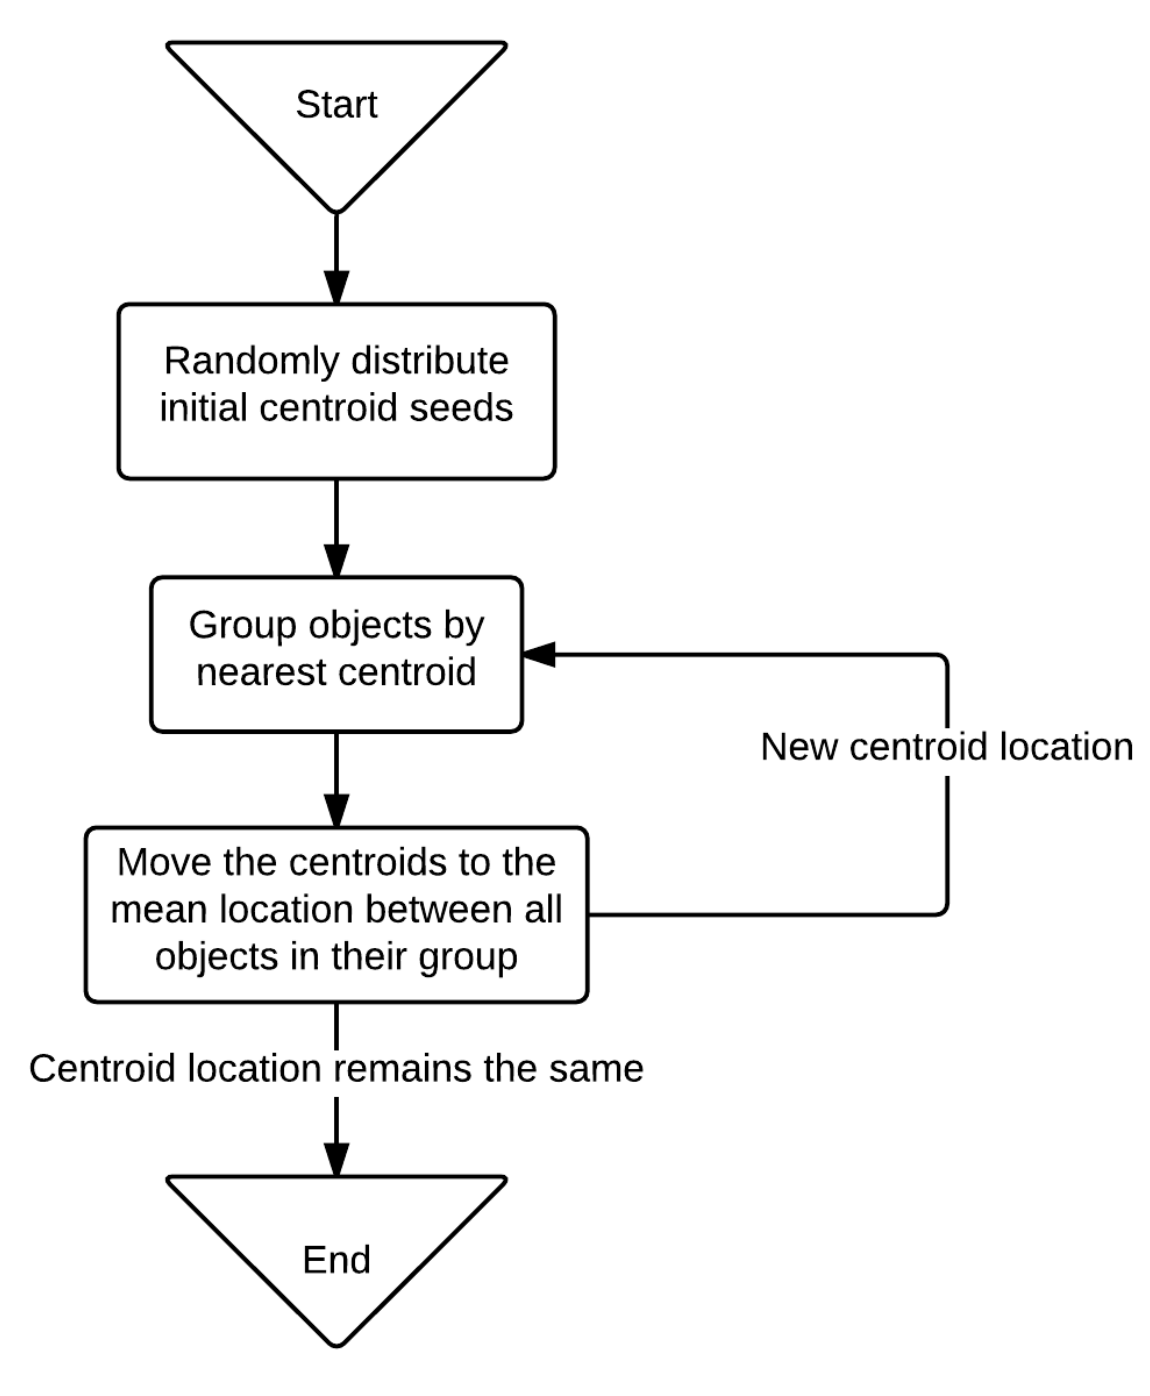

The process of the k-means algorithm (taken from Lansley et al, 2015). The code is annotated below., but you can get all the parameter by running `?Kmeans`


In [44]:
#?KMeans

In [45]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist

# KMeans with 10 clusters
kmeans = KMeans(n_clusters=10)
kmeans.fit(z_score_df)
labels = kmeans.predict(z_score_df)
cluster_centres = kmeans.cluster_centers_
z_score_df['Cluster'] = kmeans.labels_

In [46]:
z_score_df.head()

Edu_Level4    30to44  Ch_of_Scot  No_Religion   Married  Family_1Person  \
0    0.925755 -0.929394   -1.010584     1.214476 -1.091284        1.319615   
1   -0.017675  1.348150    0.071165     0.085352  1.174694       -0.984420   
2   -0.586409 -0.641698   -0.422177     0.870259 -0.559671       -0.670454   
3    1.854348 -0.488532    1.620916    -0.347871  1.690175       -1.195154   
4    0.936540  0.747933   -0.477816     0.077662  0.078929       -0.305669   

   Electric_Heating     Males   Females  Emp_FullTime    Unemployed  \
0         -0.635784  0.260954 -0.260954     -0.429766  2.172914e-17   
1         -0.283603  0.122038 -0.122038      0.396134 -2.839033e-01   
2         -0.232244 -0.401113  0.401113      1.111377  4.846440e-01   
3          0.708252  0.137473 -0.137473      0.598855 -7.266534e-01   
4         -0.540130 -0.237718  0.237718     -0.066182 -1.111418e+00   

   Good_Health  Bad_Health  Construction  Info_Comm  Education  Cluster  
0     0.414780   -0.858713      1.028574  -0.107508  -0.375570        4  
1     0.330141   -0.731475     -0.184699   0.688365  -0.407370        4  
2     0.409738   -0.163871      0.656704   0.472169  -0.099411        4  
3    -1.236621   -0.971813      0.043681   1.016984   1.627840        7  
4    -0.946389   -0.287776     -0.265115   0.954500   0.939882        7

(array([388., 834., 837., 473., 595., 412., 639., 461., 485., 362.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

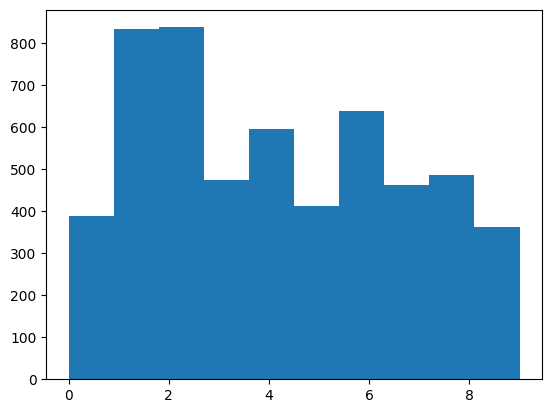

In [47]:
plt.hist(labels)
# Ok, we clustered the data, but we subjectively defined the number of clusters, 
# and as you can see is one of the key parameters

## What is the optimum number of clusters?

There is no right answer to this question. Even making judgements using some guidance on criteria involves a level of subjectivity. Your task is now to choose an appropriate number of clusters for your geodemographic classification.

Aims of the cluster analysis:
* Each cluster should be homogeneous as possible
* Each cluster group should be distinct from the other groups
* The groups should be as evenly sized as possible

In addition, to each of these, we must also consider the compositions of the cluster groups. It is important that each of the characteristics of each cluster are distinguishable and relatable to real-life neighbourhoodtypes. 

Each cluster should be homogeneous as possible. Generally, the greater the number of clusters the closer the each case is to their cluster centroid on average. However, of course, with more groups the classification becomes more difficult to interpret and the differences between some groups may become more subtle. 

A measure we can use to check this is the within-cluster sum of squares which is the sum of the squared deviations from each observation to the cluster centroid. So larger sums indicate that the cluster is more dispersed and less homogenous. A plot of the within groups sum of squares by number of clusters extracted can help determine the appropriate number of clusters (k). The tip is to look for a bend in the plot similar to a scree test in factor analysis (called the elbow method).

Each cluster group should be distinct from the other groups We can also measure how distinctive each of the clusters are in each model overall by looking at the between-cluster sum of squares. This value essentially measures how far apart clusters from different centres are. If the value is low then cases from different clusters will not be that distinctive. It is also important to observe the cluster centres to ensure that the compositions of each of the groups are logical and sufficiently unique.

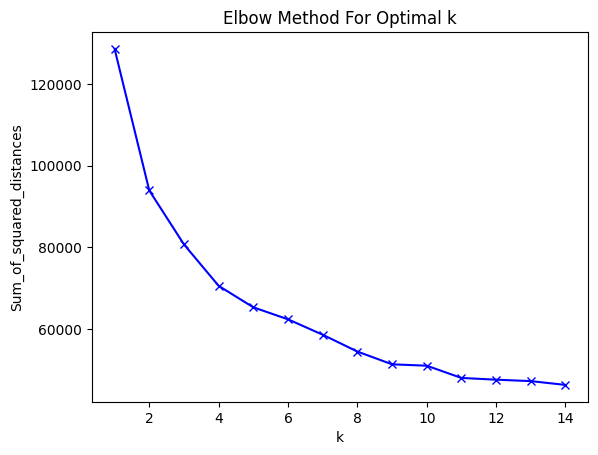

In [48]:
Sum_of_squared_distances = []

K_range = range(1,15)

for k in K_range:
 km = KMeans(n_clusters=k)
 km = km.fit(z_score_df)
 Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K_range, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Here the ‘elbow’ of the arm is around 5, which means we should try using a cluster number value close  to 5. On some plots this is much more obvious than others. 

Each cluster group should be distinct from the other groups. We can also measure how distinctive each of the clusters are in each model overall by looking at the  between-cluster sum of squares. This value essentially measures how far apart clusters from different centres are.

If the value is low then cases from different clusters will not be that distinctive. It is also important to observe the cluster centres to ensure that the compositions of each of the groups are logical and sufficiently unique. 

We can look at the between-cluster sum of squares to understand how discriminatory the models are when different numbers of groups (k) are produced.

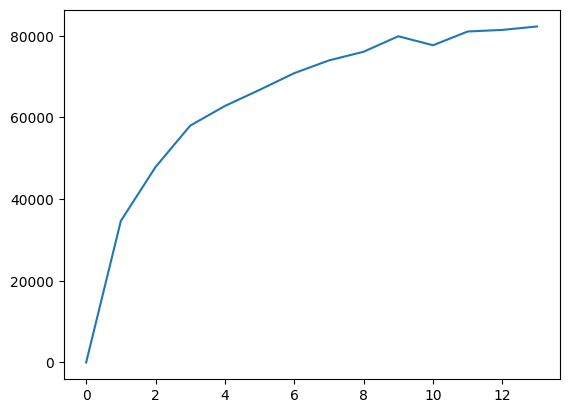

In [49]:
import numpy as np
def elbow(dataframe, n):
    kMeansVar = [KMeans(n_clusters=k).fit(dataframe.values) for k in range(1, n)] #making use of list comprehensions.
    centroids = [X.cluster_centers_ for X in kMeansVar]
    k_euclid = [cdist(dataframe.values, cent) for cent in centroids]
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(dataframe.values)**2)/dataframe.values.shape[0]
    bss = tss - wcss
    plt.plot(bss)
    plt.show()
 
elbow(z_score_df,15)

In [50]:
# KMeans with 6 clusters, after the validation with the Elbow method.
kmeans = KMeans(n_clusters=6)
kmeans.fit(z_score_df)
labels = kmeans.predict(z_score_df)
cluster_centres = kmeans.cluster_centers_

z_score_df['Cluster'] = kmeans.labels_

In [51]:
z_score_df.head()

Edu_Level4    30to44  Ch_of_Scot  No_Religion   Married  Family_1Person  \
0    0.925755 -0.929394   -1.010584     1.214476 -1.091284        1.319615   
1   -0.017675  1.348150    0.071165     0.085352  1.174694       -0.984420   
2   -0.586409 -0.641698   -0.422177     0.870259 -0.559671       -0.670454   
3    1.854348 -0.488532    1.620916    -0.347871  1.690175       -1.195154   
4    0.936540  0.747933   -0.477816     0.077662  0.078929       -0.305669   

   Electric_Heating     Males   Females  Emp_FullTime    Unemployed  \
0         -0.635784  0.260954 -0.260954     -0.429766  2.172914e-17   
1         -0.283603  0.122038 -0.122038      0.396134 -2.839033e-01   
2         -0.232244 -0.401113  0.401113      1.111377  4.846440e-01   
3          0.708252  0.137473 -0.137473      0.598855 -7.266534e-01   
4         -0.540130 -0.237718  0.237718     -0.066182 -1.111418e+00   

   Good_Health  Bad_Health  Construction  Info_Comm  Education  Cluster  
0     0.414780   -0.858713      1.028574  -0.107508  -0.375570        3  
1     0.330141   -0.731475     -0.184699   0.688365  -0.407370        3  
2     0.409738   -0.163871      0.656704   0.472169  -0.099411        3  
3    -1.236621   -0.971813      0.043681   1.016984   1.627840        2  
4    -0.946389   -0.287776     -0.265115   0.954500   0.939882        2

## Using the two plots, is it possible to determine an appropriate number of groups? 

There are also other methods for identifying statistically optimal groups such as **the average silhouette method** and **gap statistic method**.  

The groups should be as evenly sized as possible. This is more of a rule of thumb for geodemographics. However, if a single cluster group comprises a large share of the data, then it is obviously undesirable for practitioners hoping to glean a better understanding of how the needs of neighbourhoods may vary. 

You might notice that your K-means has produced a small cluster group which has exaggerated cluster centre values for a small number of variables, this is not unusual when attempting to segment social  groups. 

There are two main ways to edit the size of the groups without manipulating the variables: 

* joining similar groups or
* splitting large groups.

If one cluster group is particularly dominant in size, you can force it into two groups by isolating the cases (statistical areas) from that group only and running a 2 group solution k-means. With only one group selected, you can run a k-means as you did before, but change the number of groups produced to 2. As only one group is selected, the output areas from other groups will be excluded from the analysis. If you are happy with the results you now need to combine the two new groups with the original group membership variable.

## Evaluating a classification

Having selected the number of clusters for the final model, below are two ways of visualising the fit of a k-means model, you may need to install the packages first (as described earlier). 

In the example 5 = k, and the data corresponds with all of the Output Areas. This Creates a bivariate plot visualising a partition (clustering) of the data. All observation are represented by points in the plot, using **principal components or multidimensional scaling**. Around each cluster, an ellipse is drawn.

See here for the full documentation about the implementation of Kmeans and how you can validate your results:

* https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py
* https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation
* https://scikit-learn.org/stable/modules/clustering.html#k-means
* https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py


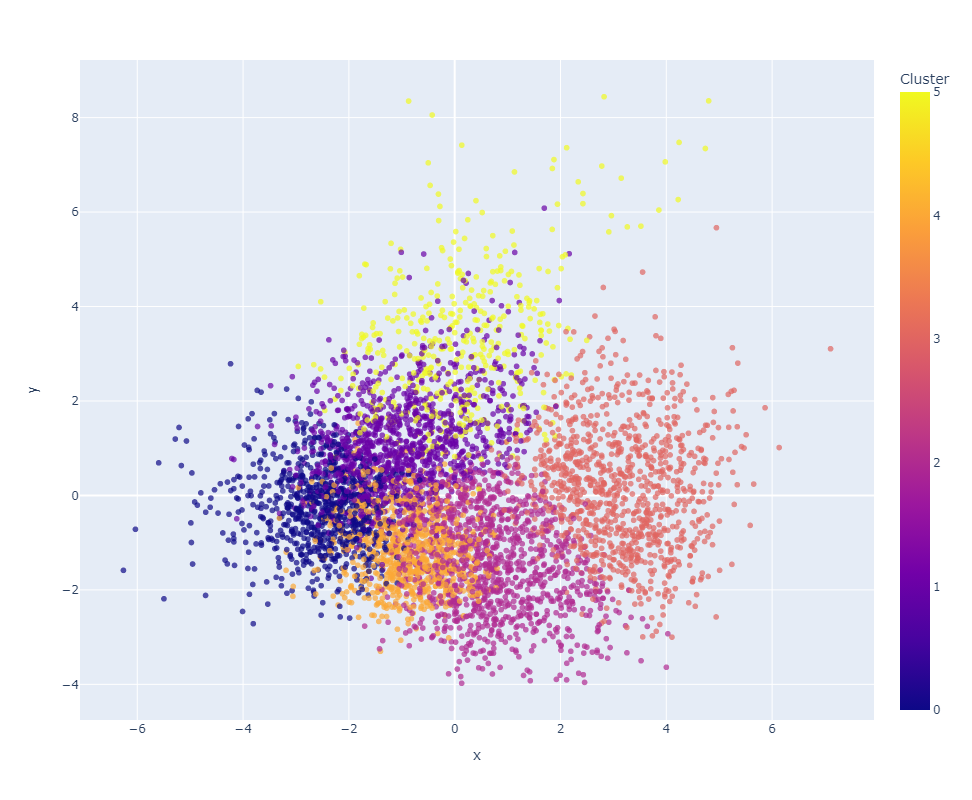

These two components explain 41.43% of the point variability.


<Figure size 1200x800 with 0 Axes>

In [52]:
# Code based on the example provided here: 
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py

import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(12, 8))

kmeans = KMeans(n_clusters=6)
clusters = kmeans.fit_predict(z_score_df)

z_score_df['Cluster'] = clusters

scaler = StandardScaler()
stand_data_scaled = scaler.fit_transform(z_score_df)

# PCA analysys.
pca = PCA(n_components=2).fit(stand_data_scaled)
pca_result = pca.transform(stand_data_scaled)

#Percentage of variance explained by each of the selected components.
variance_ratio = pca.explained_variance_ratio_

# Create a scatter plot
fig = px.scatter(x=pca_result[:, 0], y=pca_result[:, 1], color=clusters,
                 labels={'color': 'Cluster'},
                 #title='Cluster Plot against 1st 2 Principal Components',
                 opacity=0.7,
                 width=800, 
                 height=800)

plt.tight_layout()
fig.show()

print(f"These two components explain {(variance_ratio.sum()*100):.2f}% of the point variability.")


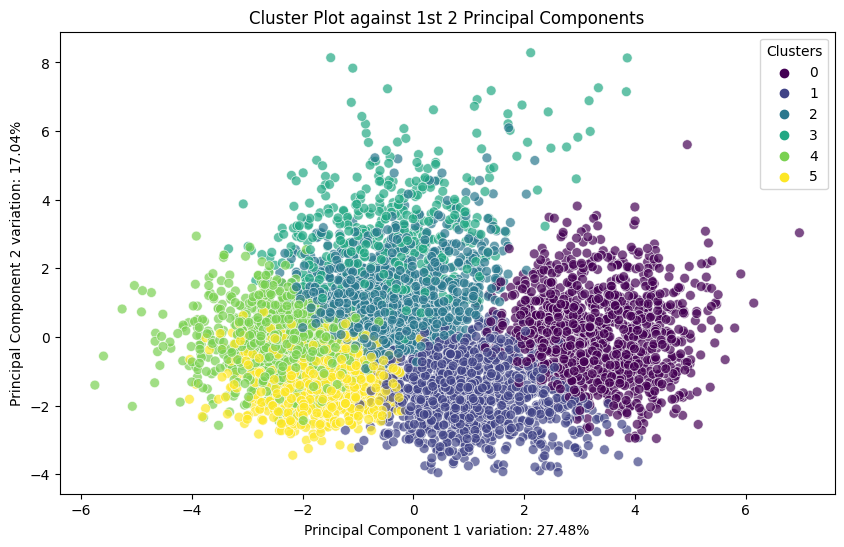

In [53]:
# Here is a static figure with the point variability included in the x/y-axis label.
# So we can see what variability is provided by each component.

kmeans = KMeans(n_clusters=6)
clusters = kmeans.fit_predict(z_score_df)

z_score_df['Cluster'] = clusters

# Standardize the data for PCA
scaler = StandardScaler()
stand_data_scaled = scaler.fit_transform(z_score_df)

# PCA
pca = PCA(n_components=2).fit(stand_data_scaled)
pca_result = pca.transform(stand_data_scaled)

#Percentage of variance explained by each of the selected components.
variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='viridis', s=50, alpha=0.7)
plt.title('Cluster Plot against 1st 2 Principal Components')
plt.xlabel(f'Principal Component 1 variation: {variance_ratio[0]*100:.2f}%')
plt.ylabel(f'Principal Component 2 variation: {variance_ratio[1]*100:.2f}%')
plt.legend(title='Clusters')
plt.show()


> You could also try re-running the K-means again with different number of groups to see how well the model disciminate based on two principal components.

You might notice that although there are obvious clusters in the graphs, some points may overlap with other clusters. This is because the data we used is complex and includes several variables which may exert unique patterns and, therefore, unrepresented by two principal components alone.



## Interpreting the cluster centres

Before any efforts are made to visualise the data, it is important you understand what it represents. The cluster centres (`kmeans.cluster_centers_`), indicates the coordinates of the centroid for each cluster group once the k-means had reached its optimum solution. It, therefore, is a good indicator of the average characteristics of each group based on the n variables that were included in the original model.

We inputted **Z-score standardised data** into the model, therefore the cluster centres are still represented as Z-scores. Zero represents the mean for each variable and values above or below indicate the number of standard deviations away from the average. The values can, therefore, be used to very easily understand how unique each group is relative to the whole sample (in this case, all of the pop_data you inputted).

**What if we print the cluster centrers?** --**Is it immediately clear what your groups represent?**

It might be easier to create charts to visualise the characteristics of each cluster group. In the example below we will create radial plots, using the first group as our example.

In [57]:
# KMeans clustering
kmeans = KMeans(n_clusters=6)
clusters = kmeans.fit_predict(z_score_df)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_


# Get the cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=z_score_df.columns)

# Create a new DataFrame with cluster assignments and column names
#result_df = pd.DataFrame({'Cluster': clusters, 'Column': z_score_df.columns})

cluster_centers.head(6)

Edu_Level4    30to44  Ch_of_Scot  No_Religion   Married  Family_1Person  \
0   -0.600829  0.039066   -0.208439    -0.026403 -0.583691        0.325736   
1   -0.790168 -0.805594    0.732679    -0.658312 -0.105544       -0.469868   
2    1.290396  1.034618   -0.820155     1.148196 -0.656576        0.986548   
3   -0.462721 -0.410072    0.703385    -0.589051  1.041607       -0.864999   
4   -0.520034  0.195281   -0.099206    -0.415970 -0.678850        0.972973   
5    0.775587  0.009497   -0.268766     0.251396  0.790792       -0.555249   

   Electric_Heating     Males   Females  Emp_FullTime  Unemployed  \
0         -0.308844  0.049950 -0.049950     -0.579713    0.793018   
1         -0.189833 -0.859242  0.859242     -0.599911    0.005071   
2          0.126101  0.709169 -0.709169      0.962547   -0.420643   
3         -0.422585 -0.103187  0.103187      0.427724   -0.435615   
4          2.341026  0.897573 -0.897573     -1.054489    1.114049   
5         -0.348057 -0.212360  0.212360      0.378116   -0.551195   

   Good_Health  Bad_Health  Construction  Info_Comm  Education   Cluster  
0     0.086426    0.307162      0.080720  -0.368748  -0.453356  2.003802  
1    -0.237919    0.873352      0.118130  -0.436039  -0.362733  3.988495  
2     0.021083   -0.591697     -0.558736   0.839683   0.430597  0.003929  
3     0.264144   -0.349788      0.907323  -0.379399  -0.144915  4.996556  
4     0.192829    0.845724     -0.022936  -0.237054  -0.394721  2.899582  
5    -0.182104   -0.714145     -0.408837   0.421566   0.714659  1.000000

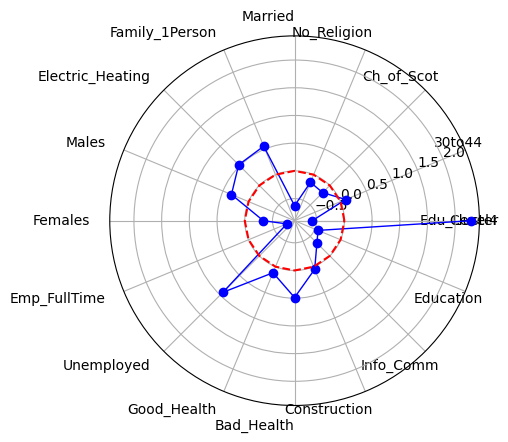

In [55]:
# Code adapted from:
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html

first_row_centers = cluster_centers.iloc[0, :]

# len of features
num_features = len(first_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, first_row_centers, linewidth=1, color='blue', marker='o', label='Centers')
# Add an extra red line at the 0.0 value
ax.plot(theta, np.zeros_like(first_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns, rotation=45, ha='right')

plt.show()
#Ignore the cluster polar values, and focus in he census variables.

##  Code, Evaluate and Repeat

You can now repeat this for the other cluster groups. 

**Do you think Can you create meaningful labels for your groups based on their characteristics?**

# Mapping the clusters

Now, that we have the cluster we can remove the standarised percentages and return the original values.

In [ ]:
#list(z_score_df.columns)

In [ ]:
#z_score_df.drop([
 'Edu_Level4',
 '30to44',
 'Ch_of_Scot',
 'No_Religion',
 'Married',
 'Family_1Person',
 'Electric_Heating',
 'Males',
 'Females',
 'Emp_FullTime',
 'Unemployed',
 'Good_Health',
 'Bad_Health',
 'Construction',
 'Info_Comm',
 'Education'], axis=1, inplace=True)
z_score_df.info()

In [ ]:
# Concatenate the resulting tables.
final_df = pd.concat([glasglow_census_data, z_score_df], axis=1, ignore_index=False)
final_df.head()

In [ ]:
final_df.columns

In [ ]:
final_df.explore(column='Cluster', cmap='Set1', tiles='CartoDB positron')

# Naming the clusters

Last part of this process is formulating names for geodemographic groups, unfortunately is not easy and can be contentious. Essentially, the names are derivative of the researcher’s perceptions of the cluster centres and sometimes also consider their geographic distributions. 

> Names should be informative, short and memorable. They should also not make unnecessary assumptions or be derogatory in any way. Look at all of your plots - can you derive names for your clusters?

It is not uncommon for one of your cluster groups to represent the typical traits of the entire dataset. This  group would, therefore, have very moderate **Z-scores**. Once you are happy with your clusters making sense, being nameable and looking sensible across all of your plots you are finished.

As a final step, try renaming your final clusters and then mapping the results. Here you have an example of how to rename your clusters using a `function` and `replace` methods.

````python

def rename_column(x): 
    x = x.replace("1", "Your Name")
    x = x.replace("2", "Your Second Name")
    # Add more values as you need. As many as clusters you have
    return x

df['Cluster'] = df['Cluster'].apply(rename_column)

````
For example, the names and pen portraits for the supergroups, groups, and subgroups of the 2011 Output Area Classification can be downloaded from this [link](https://webarchive.nationalarchives.gov.uk/ukgwa/20160105160709/http://www.ons.gov.uk/ons/guide-method/geography/products/area-classifications/ns-area-classifications/ns-2011-area-classifications/pen-portraits-and-radial-plots/pen-portraits-oa.pdf).

# Challenge 1: Geodemographic Classification

In this challenge, you will replicate the process of creating a geodemographic classification using the k-means clustering algorithm. Please select any city in the UK except London, Liverpool, or Glasgow. The main goal is to generate a meaningful and informative classification that captures the diversity of areas in your dataset using the census data ( For England, you can try to use the 2021 or 2011 census, and for Scotland, you need to use the 2011 census data) 

1. Define the main goal for the geodemographic classification (marketing, retail and service planning). 
2. Look for census data from the selected city for which you would like to generate the geodemographic classification.
3. The census data at the Output Area OA level. Select multiple topics of at least four topics (socio-demographics, economics, health, and so on). Describe your topic selection accordingly based on the goal of your geodemographic classification. For example, if your geodemographics are related to marketing, Economic variables might be the appropriate selection. 
4. Identify the variables that will be crucial for effectively segmenting neighbourhoods. Evaluate how this choice may impact the classification results, including a DEA analysis.
5. Prepare, adjust or clean the dataset addressing any missing values or outliers that could distort the clustering results.
6. Include standardisation between areas and variables. Make an appropriate analysis and adjust the variable selection accordingly for any multicollinearity.
7. Utilize the k-means clustering algorithm to create a classification based on the selected variables.
8. Define the optimum number of clusters (i.e., using the Elblow method). Experiment with different values of k.
9. Evaluate your cluster groups (e.g., using PCA) and interpret your cluster centres. Describe your results and repeat the process to adjust the variable selection and cluster groups to provide more meaningful results for your geodemographic goal. Interpret the characteristics of each cluster. What demographic patterns or similarities are prevalent within each group?
10. Map the final cluster groups
11. Finish the analysis by naming the final clusters and plotting a final map that includes the census values and the provided names.
12. Finally, acknowledge the subjective nature of classification and make analytical decisions to produce an optimum classification for your specific purpose. Reflect on the challenges and insights gained during the classification process. Ensure you document your analytical decisions and the rationale behind any important decision. Once your geodemographics are constructed, describe the potential use cases for the geodemographic classification you have built based on your initial goal.

1. Define the main goal for the geodemographic classification (marketing, retail and service planning). 

Geodemographic classification is a method of grouping geogrpahical neighbourhoods that are based on similar characteristics. They can be used for marketing so that different companies may know more about where their proudcts should be placed. Such as young adults who may be thinkning about having children, geodemographic classification can show that there are more people living in these areas therefore marketing and retail should be placed more in these areas. Or if there are areas that have more old people, who tend to require more healthcare services, geodemographic classification can help show areas that may be of importance 

**IN my topic...**

# Finishing the Lab

Please ensure that you save all your code and upload the latest version of this notebook to your **GitHub repository**. 

> Always check the size of your notebook before making any commit; use the `.gitignore` to skip big data sets or undesired files. Describe where to find the data and the correct structure so that when the marker fork, your code can reproduce your results. 


# References

Arabie, P., Hubert, L.J. and De Soete, G. Eds. (1996). Clustering and Classification. Singapore, World Scientific 

Debenham, J. (2002) Understanding Geodemographic Classification: Creating The Building Blocks For An Extension. Working Paper. School of Geography, University of Leeds.

Everitt, B.S. & T. Hothorn. (2014). A Handbook of Statistical Analyses Using R (3rd ed.) Boca Raton, Chapman & Hall

Everitt, B.S., Landau, S. and Leese, M. (2001). Cluster Analysis 4th Ed. London, Arnold Gale, C.G., Singleton, A., Bates, A.G. and Longley, P.A., 2016. Creating the 2011 area classification for output areas (2011 OAC). Journal of Spatial Information Science, 12, pp.1-27.

Harris R, Sleight P, Webber R. (2005). Geodemographics: Neighbourhood Targeting and GIS. Chichester, UK: John Wiley and Sons. 

Kabacoff, R. (2015). R in Action: Data Analysis and Graphics with R. Manning Publications Co., Greenwich, USA 

Lansley, G and Cheshire, J (2016). An Introduction to Spatial Data Analysis and Visualisation in R. CDRC
Learning Resources. Online: https://data.cdrc.ac.uk/tutorial/an-introduction-to-spatial-data-analysis-and-visualisation-in-r

Leventhal, B. (2016). Geodemographics for Marketers: Using Location Analysis for Research and Marketing. London, Kogan Page Publishers.

Longley, P.A. (2017). Geodemographic Profiling. The International Encyclopedia of Geography Wiley and
the American Association of Geographers (AAG).

Longley, P.A., Goodchild, M., Maguire, D.J. and Rhind, D.W. (2010). Geographic Information Systems and Science. 4th Edition. John Wiley & Sons

Spielman, S. and A.D. Singleton. (2015). An Open Geodemographic Classification of US Census Tracts." Annals of the Association of American Geographers.

Usuelli, M. (2014). R Machine Learning Essentials. Birmingham, Packt http://geogale.github.io/2011OAC/ - this webpage provides additional material and information to aid use of the 2011 OAC, including the R code used to build it https://www.opengeodemographics.com/ - for details on open geodemographic products made in the UK https://www.geodemographics.org.uk/ - a comprehensive directory of hand-selected websites for people interested in the application of geodemographics and geo-spatial analysisraphics and geo-spatial analysis